This script is designed to extract the data from a .dat file to be used for generating the power saturation curves for laser power and microwave power used for ODMR with nanodiamonds.

This program is badly written at the minute. 
Created by: Ryan Corbyn, 10/09/2020.

Edited by: 

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plot
import os 
import scipy.optimize as opt

In [2]:
def get_data_from_file(data_file):
    # The method accepts a string containing the address of the data file in question. 
    # data from this file is then read into a panda data frame. 
    
    data_frame = pd.read_table(data_file)
    return(data_frame)

In [3]:
def power_curve(P_uw, c_inf, P_sat):
    # creates a power dependence curve. 
    # y = Contrast as a functin of applied power, c_inf = maximum ODMR contrast
    # P_sat = stauration power.
    y = (c_inf * P_uw)/(P_uw + P_sat)
    
    return(y)

In [4]:
def curve_optimisation(x, y, c_inf, P_sat):
    
    P = [c_inf, P_sat]
    coeffs, confidence = opt.curve_fit(power_curve, x, y, P)
    opt_error = np.sqrt(np.diag(confidence))
    
    return(coeffs, opt_error)

In [5]:
data_file = 'H:\\My Documents\\Strathclyde_Back_up\\Graphs_and_analysis\\ODMR\\20200607\\20200607_NVScan_analysis.dat'
frame = get_data_from_file(data_file)

laser_power = np.array([39, 80, 180, 270, 340, 400, 500, 600, 700, 800, 900])
contrast = np.array(frame['Max Contrast (%)'][4:15])
contrast_error = np.array(frame['Contrast error (%)'][4:15])
plot.errorbar(laser_power, contrast, contrast_error, linestyle = '', marker = 'x', color = 'k')
plot.xlabel(r'Laser Power ($\mu$W)')
plot.ylabel('ODMR Max Contrast (%)')

FileNotFoundError: [Errno 2] No such file or directory: 'H:\\My Documents\\Strathclyde_Back_up\\Graphs_and_analysis\\ODMR\\20200607\\20200607_NVScan_analysis.dat'

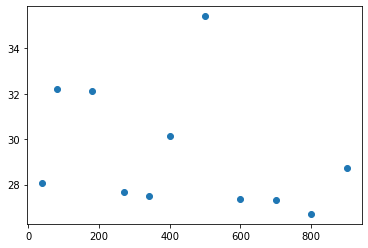

In [29]:
FWHM1 = np.array(frame['FWHM 1 (MHz)'][4:15])

plot.scatter(laser_power, FWHM1)

In [8]:
microwave_power = np.array([10, 13, 16, 19, 22, 25, 28, 31])
#microwave_power.sort()

power_mW = 0.001 * 10**((microwave_power)/10.0)

ODMR_contrast1 = np.array([0, 0, 1.2, 1.9, 1.6, 2.3, 2.77, 4.5, 4.92, 7.2]) 
ODMR_contrast2 = np.array([1.2, 1.99, 2.87, 3.4, 5.09, 6.17, 7.41, 8.73])
#ODMR_contrast3 = np.array([1.5, 2.05, 2.87, 3.40, 5.09, 6.17, 7.41, ])
#ODMR_contrast.sort()

#ODMR_error = np.array(frame['Contrast error (%)'][15::])
#ODMR_error.sort()

NameError: name 'ODMR_contrast' is not defined

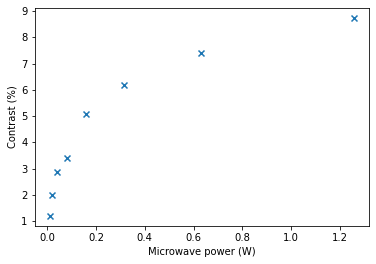

In [12]:
plot.scatter(power_mW, ODMR_contrast2,  marker = 'x')
plot.xlabel('Microwave power (W)')
plot.ylabel('Contrast (%)')

sat_curve_params, sat_curve_error = curve_optimisation(power_mW, ODMR_contrast, 10, 1)
sat_curve = power_curve(power_mW, sat_curve_params[0], sat_curve_params[1])
plot.plot(power_mW, sat_curve)

In [81]:
print(sat_curve_params)
print(sat_curve_error)

[11.68417091  0.39089419]
[0.81384546 0.10227055]


In [83]:
def get_r_squared(x, y_data, y_fitting):
    # This is a function used to generate the goodness of fit metric r^2.
    # This value will be used to judge the effectiveness of the curve fitting 
    # used to find the resonant frequencies of the NV centre.
    
    y_data_mean = np.mean(y_data)
    SStot = np.sum((y_data - y_data_mean)**2) # Find the variation in experimental y values.
    SSres = np.sum((y_data - y_fitting)**2) # Find the variation betweem the experimental and fitted y values. 
    
    r_squared = 1 - (SSres/SStot) # Calculate R^2
    
    return(r_squared)

In [84]:
r2 = get_r_squared(power_mW, ODMR_contrast, sat_curve)
print(r2)

0.926665931709958
